###4.1 데이터에서 학습한다!

###4.2 손실함수

4.2.1 오차제곱합

In [ ]:
def sum_square_error(y,t):
  return 0.5 * np.sum((y-t)**2)

In [ ]:
import numpy as np

#정답을 인코딩한 값 => 정답레이블은 2번 
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

#y는 신경망 출력값 => 2번째 값이 0.6으로 가장 높은 값
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_square_error(np.array(y), np.array(t))

0.09750000000000003

In [ ]:
#y는 신경망 출력값 => 7번째 값이 0.6으로 가장 높은 값
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_square_error(np.array(y), np.array(t))

'''위의 sum_square_error는 손실함수를 나타낸 값으로 첫번째 y 리스트는 정답과 같은 출력을 나타내
손실값이 작고, 아래의 sum_square_error는 다른 값을 나타내 손실값이 더 크다.'''

0.5975

4.2.2 교차 엔트로피 오차

In [ ]:
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta)) #y와 t는 넘파이 배열
  '''np.log(y)가 아닌 np.log(y+delta)인 이유는 np.log0이 될 경우,
  마이너스 무한대를 의미하므로 아주 작은 delta값을 더하여 방지해줌'''

In [ ]:
import numpy as np

#정답을 인코딩한 값 => 정답레이블은 2번 
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

#y는 신경망 출력값 => 2번째 값이 0.6으로 가장 높은 값
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [ ]:
#y는 신경망 출력값 => 7번째 값이 0.6으로 가장 높은 값
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

4.2.3 미니배치학습

https://github.com/WegraLee/deep-learning-from-scratch/blob/master/dataset/mnist.py

datasets 폴더 생성 -> mnist.py 파일 생성하여 위 링크의 코드 복붙

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from datasets.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, 
                                                  one_hot_label=True)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [ ]:
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [ ]:
train_size = x_train.shape[0]
batch_size = 10 #10개 단위로 학습시킴
#무작위로 batch_size만큼 데이터 추출
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [ ]:
#0이상 60000미만의 수 중에서 무작위로 10개 골라냄
np.random.choice(60000,10)

array([51876, 59921, 11202, 55852, 27211, 27787, 56434, 43048, 10612,
       29266])

4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [ ]:
'''y는 신경망의 출력, t는 정답레이블(원핫인코딩)
y가 1차원 = 데이터 하나당 교차엔트로피 구할 때
reshape을 통해 데이터의 형상을 바꿔주고 배치크기로 나눠 정규화 한 후,
이미지 1장 당 평균 교차 엔트로피 오차 계산'''


def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [ ]:
'''y는 신경망의 출력, t는 정답레이블(원핫인코딩 아닐 때)'''


def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arrange(batch_size), t] + 1e-7)) / batch_size

'''
np.arrange(batch_size): 0부터 batch_size-1까지의 배열 생성
y[np.arrange(batch_size), t] 각 데이터의 정답 레이블에 해당하는 신경망의 출력 추출
ex)
batch_size = 5
np.arrange(batch_size) : [0,1,2,3,4]
t : [2,7,0,9,4]
y[np.arrange(batch_size), t] : [y[0,2], y[1,7], y[2,0],y[3,9], y[4,4]]
'''


###4.3 수치 미분

4.3.1 미분

In [ ]:
'''미분구현의 안좋은 예
  개선점 2가지 
  1. 파이썬의 반올림 오차(rounding error): 소수점 이하가 생략되어 최종 계산결과에 오차 발생
  2. f의 차분: 실제 미분값은 x지점에서의 기울기를 구하는 것이지만, 아래 식은 x에 근접할 때의 기울기를 구하는 것
  '''

def numerical_diff(f,x):
  h = 10e-50 #0.0000...1(소수점 아래 49번째까지)
  return (f(x+h) - f(x))/h

In [ ]:
np.float32(1e-50)

0.0

In [ ]:
'''차분의 오차를 줄이기 위해 '중심차분(중앙차분)'을 통해 개선'''

def numerical_diff(f,x):
  h = 1e-4 #0.001
  return (f(x+h) - f(x-h))/ (2*h)

4.3.2 수치 미분의 예

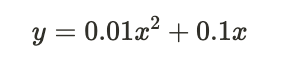

In [ ]:
def function_1(x):
  return 0.01*x**2 + 0.1*x 

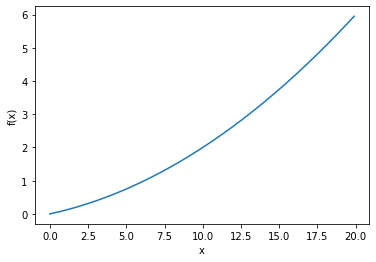

In [ ]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) #0이상 20미만까지 0.1간격의 배열 생성
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

In [ ]:
#진정한 미분값 2
#수치 미분값
numerical_diff(function_1, 5)

0.1999999999990898

In [ ]:
#진정한 미분값 3
#수치 미분값
numerical_diff(function_1, 10)

0.2999999999986347

4.3.3 편미분

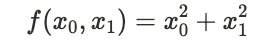

위의 식에 해당하는 그래프

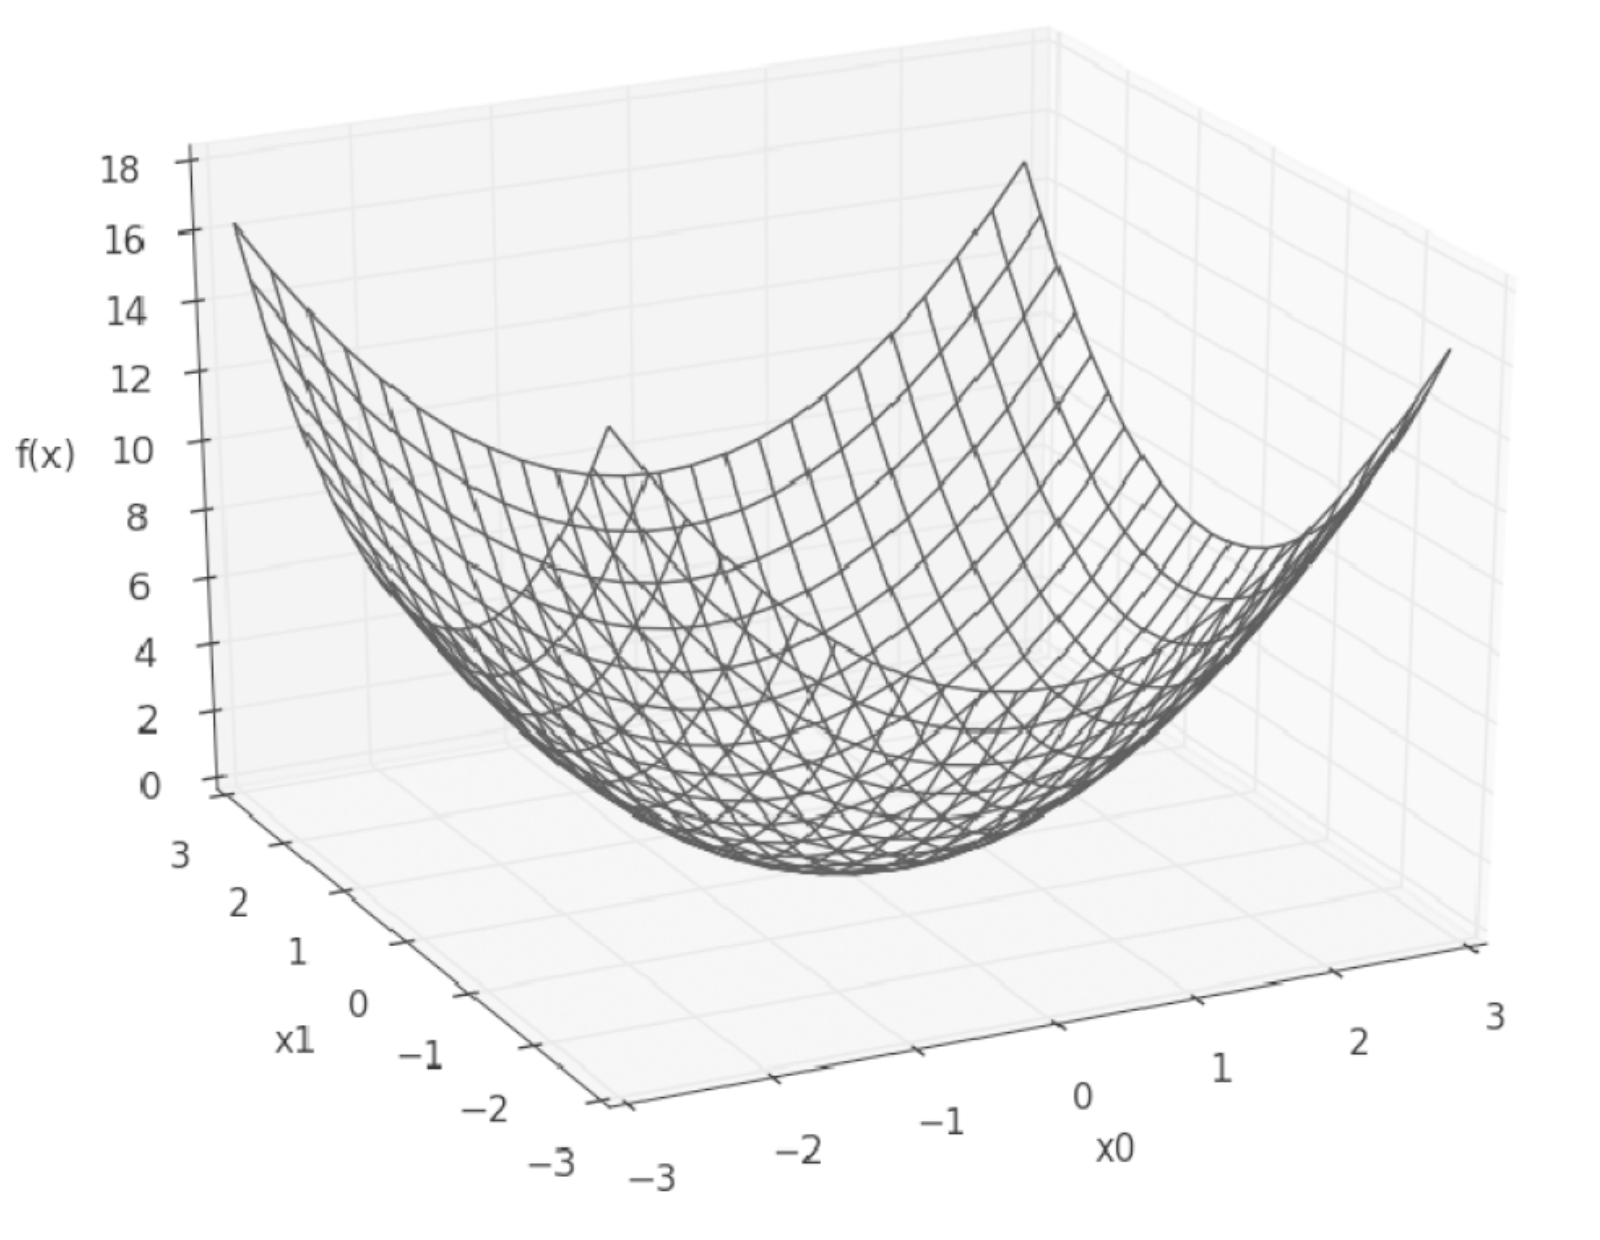

In [ ]:
'''인수 x는 numpy배열로 가정
  numpy배열의 각 원소를 제곱하고 그 합을 구함
'''

def function_2(x):
  return x[0]**2 + x[1]**2 

def function_2(x):
  return np.sum(x**2)   

In [ ]:
#x0=3, x1=4일 때, x0에 대한 편미분
def function_tmp1(x0):
  return x0*x0 + 4.0**2.0 #x1을 상수 취급

#수치미분 구하는 함수
numerical_diff(function_tmp1, 3.0) 

6.00000000000378

In [ ]:
#x0=3, x1=4일 때, x1에 대한 편미분
def function_tmp2(x1):
  return 3.0**2.0 + x1*x1 #x0을 상수 취급

#수치미분 구하는 함수
numerical_diff(function_tmp2, 4.0) 

7.999999999999119

###4.4 기울기

In [ ]:
#기울기: 모든 변수의 편미분을 벡터로 정리한 것
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

#f는 함수, x는 numpy 배열
#numpy배열 x의 각 원소에 대해 수치미분 계산
#기울기 구하는 함수
def numerical_gradient_no_batch(f, x): 
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같고 그 원소가 모두 0인 배열 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [ ]:
numerical_gradient_no_batch(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [ ]:
numerical_gradient_no_batch(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [ ]:
numerical_gradient_no_batch(function_2, np.array([3.0, 0.0]))

array([6., 0.])

4.4.1 경사법(경사하강법)

In [ ]:
#경사하강법 함수
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x
  
  for i in range(step_num):
    grad = numerical_gradient_no_batch(f, x) #함수 기울기 구함
    x -= lr * grad #함수 기울기에 학습률을 적용하여 갱신하는 부분
  
  return x


'''f: 최적화하려는 함수
  init_x: 초깃 값
  lr: learning rate 학습률,
  step_num: 경사법에 따른 반복 횟수
  numerical_gradient_no_batch(f, x): 함수의 기울기
'''

In [ ]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0]) #초깃값 -3, 4로 설정
gradient_descent(function_2, init_x, lr=0.1, step_num=100) #최종결과 (0,0)에 가까운 값 나옴

array([-6.11110793e-10,  8.14814391e-10])

In [ ]:
#학습률이 너무 큰 예
init_x = np.array([-3.0, 4.0]) #초깃값 -3, 4로 설정
gradient_descent(function_2, init_x, lr=10.0, step_num=100) #최종결과 발산

array([-2.58983747e+13, -1.29524862e+12])

In [ ]:
#학습률이 너무 작은 예
init_x = np.array([-3.0, 4.0]) #초깃값 -3, 4로 설정
gradient_descent(function_2, init_x, lr=1e-10, step_num=100) #갱신되지 않은 채, 초깃값과 비슷한 결과

array([-2.99999994,  3.99999992])

4.4.3 신경망에서의 기울기

https://github.com/WegraLee/deep-learning-from-scratch/blob/master/common/functions.py

common 폴더에 functions.py 파일에 복붙

https://github.com/WegraLee/deep-learning-from-scratch/blob/master/common/gradient.py

common 폴더에 gradient.py 파일에 복붙

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x) #예측 수행
        y = softmax(z) #활성 함수
        loss = cross_entropy_error(y, t) #손실 함수

        return loss

In [ ]:
net = simpleNet()
print(net.W) #가중치 매개변수

[[-0.24166418  0.44768379 -0.18604074]
 [ 0.70972021 -1.24363894 -0.83752647]]


In [ ]:
#예측 수행
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.49374968 -0.85066477 -0.86539827]


In [ ]:
np.argmax(p) #최댓값의 index

0

In [ ]:
t = np.array([0, 0, 1]) #정답 레이블
net.loss(x, t) #손실함수 값

1.7762589599664957

In [ ]:
def f(W):
  return net.loss(x, t)

#net.W를 인수로 받아 손실함수를 계산하는 새로운 함수 f를 정의하여 numerical_gradient에 넘김
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.39536819  0.10306945 -0.49843764]
 [ 0.59305229  0.15460417 -0.74765646]]


In [ ]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.39536819  0.10306945 -0.49843764]
 [ 0.59305229  0.15460417 -0.74765646]]


In [ ]:
# coding: utf-8
import numpy as np
 
#1차원 배열 처리
def numerical_gradient_1d(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        
    return grad

#2차원 배열 처리
def numerical_gradient_2d(f, X):
    if X.ndim == 1:
        return _numerical_gradient_1d(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_1d(f, x)
        
        return grad

#다차원 배열 처리
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

###4.5 학습 알고리즘 구현하기

4.5.1 2층 신경망 클래스 구현하기

In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1) #activation function에 의한 결과
        t = np.argmax(t, axis=1) #정답 결과
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    '''각 매개변수의 손실 함수에 대한 기울기 계산'''
    def numerical_gradient(self, x, t): #epoch 별 지표 측정하는 경사하강 
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        

    #numerical_gradient의 개선판    
    def gradient(self, x, t): 
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [4]:
'''input_size 입력층의 뉴런수
  hidden_size 은닉층의 뉴런수
  ouoput_size 출력층의 뉴런수'''
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10) 
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [9]:
#예측처리 수행
import numpy as np
x = np.random.rand(100, 784) #dummy data 100장 분량
y = net.predict(x)
print('x', x)
print('y', y)

x [[0.32531773 0.70805611 0.60574919 ... 0.35775152 0.7211273  0.61306672]
 [0.89267776 0.05692132 0.93488033 ... 0.36457266 0.24001627 0.98361935]
 [0.45866182 0.45665114 0.61167648 ... 0.46781425 0.09818524 0.23573533]
 ...
 [0.33828074 0.00615481 0.42872704 ... 0.70612522 0.74257347 0.75671019]
 [0.59881081 0.85521963 0.07782487 ... 0.8622385  0.09269847 0.59360758]
 [0.5166247  0.07191756 0.05353078 ... 0.52239814 0.03547787 0.59894386]]
y [[0.10159781 0.09444548 0.10594157 0.10614683 0.09574031 0.09622638
  0.10271365 0.09638365 0.10643972 0.09436459]
 [0.10163976 0.09442265 0.10551923 0.10614046 0.09585296 0.09612778
  0.10274468 0.09674951 0.10648764 0.09431533]
 [0.10158645 0.09430493 0.10536444 0.10597111 0.09586625 0.0968755
  0.10274685 0.09637549 0.10645718 0.09445181]
 [0.10188774 0.09440961 0.10542787 0.10602832 0.0959448  0.09621053
  0.10274376 0.09665485 0.10650818 0.09418434]
 [0.10198577 0.09444094 0.10560473 0.10608797 0.0955318  0.0959772
  0.10313065 0.09660166 0.

In [13]:
print('x의 원소 수:', len(x))
print('원소 하나 당 차원 수:', len(x[0]))
print('y의 원소 수:', len(y))
print('원소 하나 당 차원 수:', len(y[0]))

x의 원소 수: 100
원소 하나 당 차원 수: 784
x의 원소 수: 100
원소 하나 당 차원 수: 10


In [17]:
x = np.random.rand(100,784) #dummy 입력 데이터(100장 단위)
t = np.random.rand(100,10) #dummy 결과 데이터(100장 단위)

#기울기 계산
grads = net.numerical_gradient(x, t) #손실함수 기울기 계산해주는 함수
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


4.5.2 미니배치 학습 구현하기

In [ ]:
'''
전체 60000개의 데이터에서 매번 100개의 미니배치 데이터를 임의로 추출
확률적 경사 하강법을 수행하며 매개변수 갱신
매개변수 갱신 반복횟수 10000번 설정
갱신할 때마다 훈련데이터에 대한 손실함수 계산 및 값을 배열에 추가한 후, 변화 추이 그래프로 표현
'''
'''훈련데이터에 대한 loss 값만 추적 -> 오버피팅 되지 않아 범용적 데이터도 올바르게 판별할 수 있는지 검증데이터에 대한 loss 값 추적도 필요!'''
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from datasets.mnist import load_mnist
# from two_layer_net import TwoLayerNet #위에서 클래스 선언

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
  

# 그래프 그리기
markers = {'train': 'o'}
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from datasets.mnist import load_mnist
# from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train acc, test acc | 0.0993, 0.1032


In [ ]:
'''
오버피팅이 일어날 경우 훈련데이터가 아닌 데이터에 대해 잘못된 판단을 하기 시작하여 검증데이터셋 정확도는 점차 떨어짐
-> 검증데이터셋의 정확도가 떨어지는 기점을 잡아 과적합을 방지하여 학습을 중단시기는 것은 조기종료(early stopping)이라고 함!
'''